In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk("train2.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#Comment -> to link and connect the google colab with google drive and to open the main google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#Comment -> to change directory from gdrive to music genre
%cd /gdrive/My Drive/FakeReviews/
%ls -Irt

/gdrive/My Drive/FakeReviews
test2.csv  test3.csv  train2.csv  train3.csv


In [ ]:
FakeReviews_train=pd.read_csv("train3.csv")
FakeReviews_test=pd.read_csv("test3.csv")

In [ ]:
FakeReviews_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,Feedback,Similarity,#posts,#followers,#follows,fake
0,1,27.0,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.0,2,0.0,0,44,0,0,286,2740,533,0
2,1,1.0,2,0.0,0,0,0,1,13,159,98,0
3,1,0.0,1,0.0,0,82,0,0,679,414,651,0
4,1,0.0,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
FakeReviews_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,Feedback,Similarity,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,14.042535,1.460069,2.081094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,20.536424,1.052601,8.287133,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,25.500000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,92.000000,12.000000,89.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
FakeReviews_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   Feedback              576 non-null    int64  
 7   Similarity            576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
print(FakeReviews_train.shape)
print(FakeReviews_test.shape)

(576, 12)
(120, 12)


In [ ]:
print(FakeReviews_train.isna().values.any().sum())
print(FakeReviews_test.isna().values.any().sum())

0
0


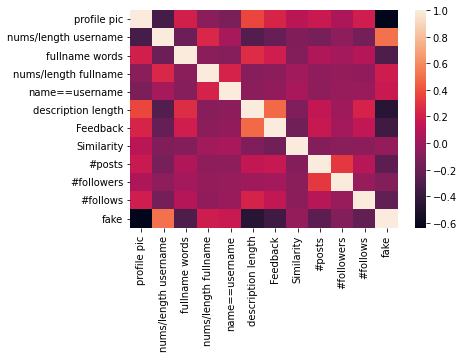

In [ ]:
corr=FakeReviews_train.corr()
sns.heatmap(corr)

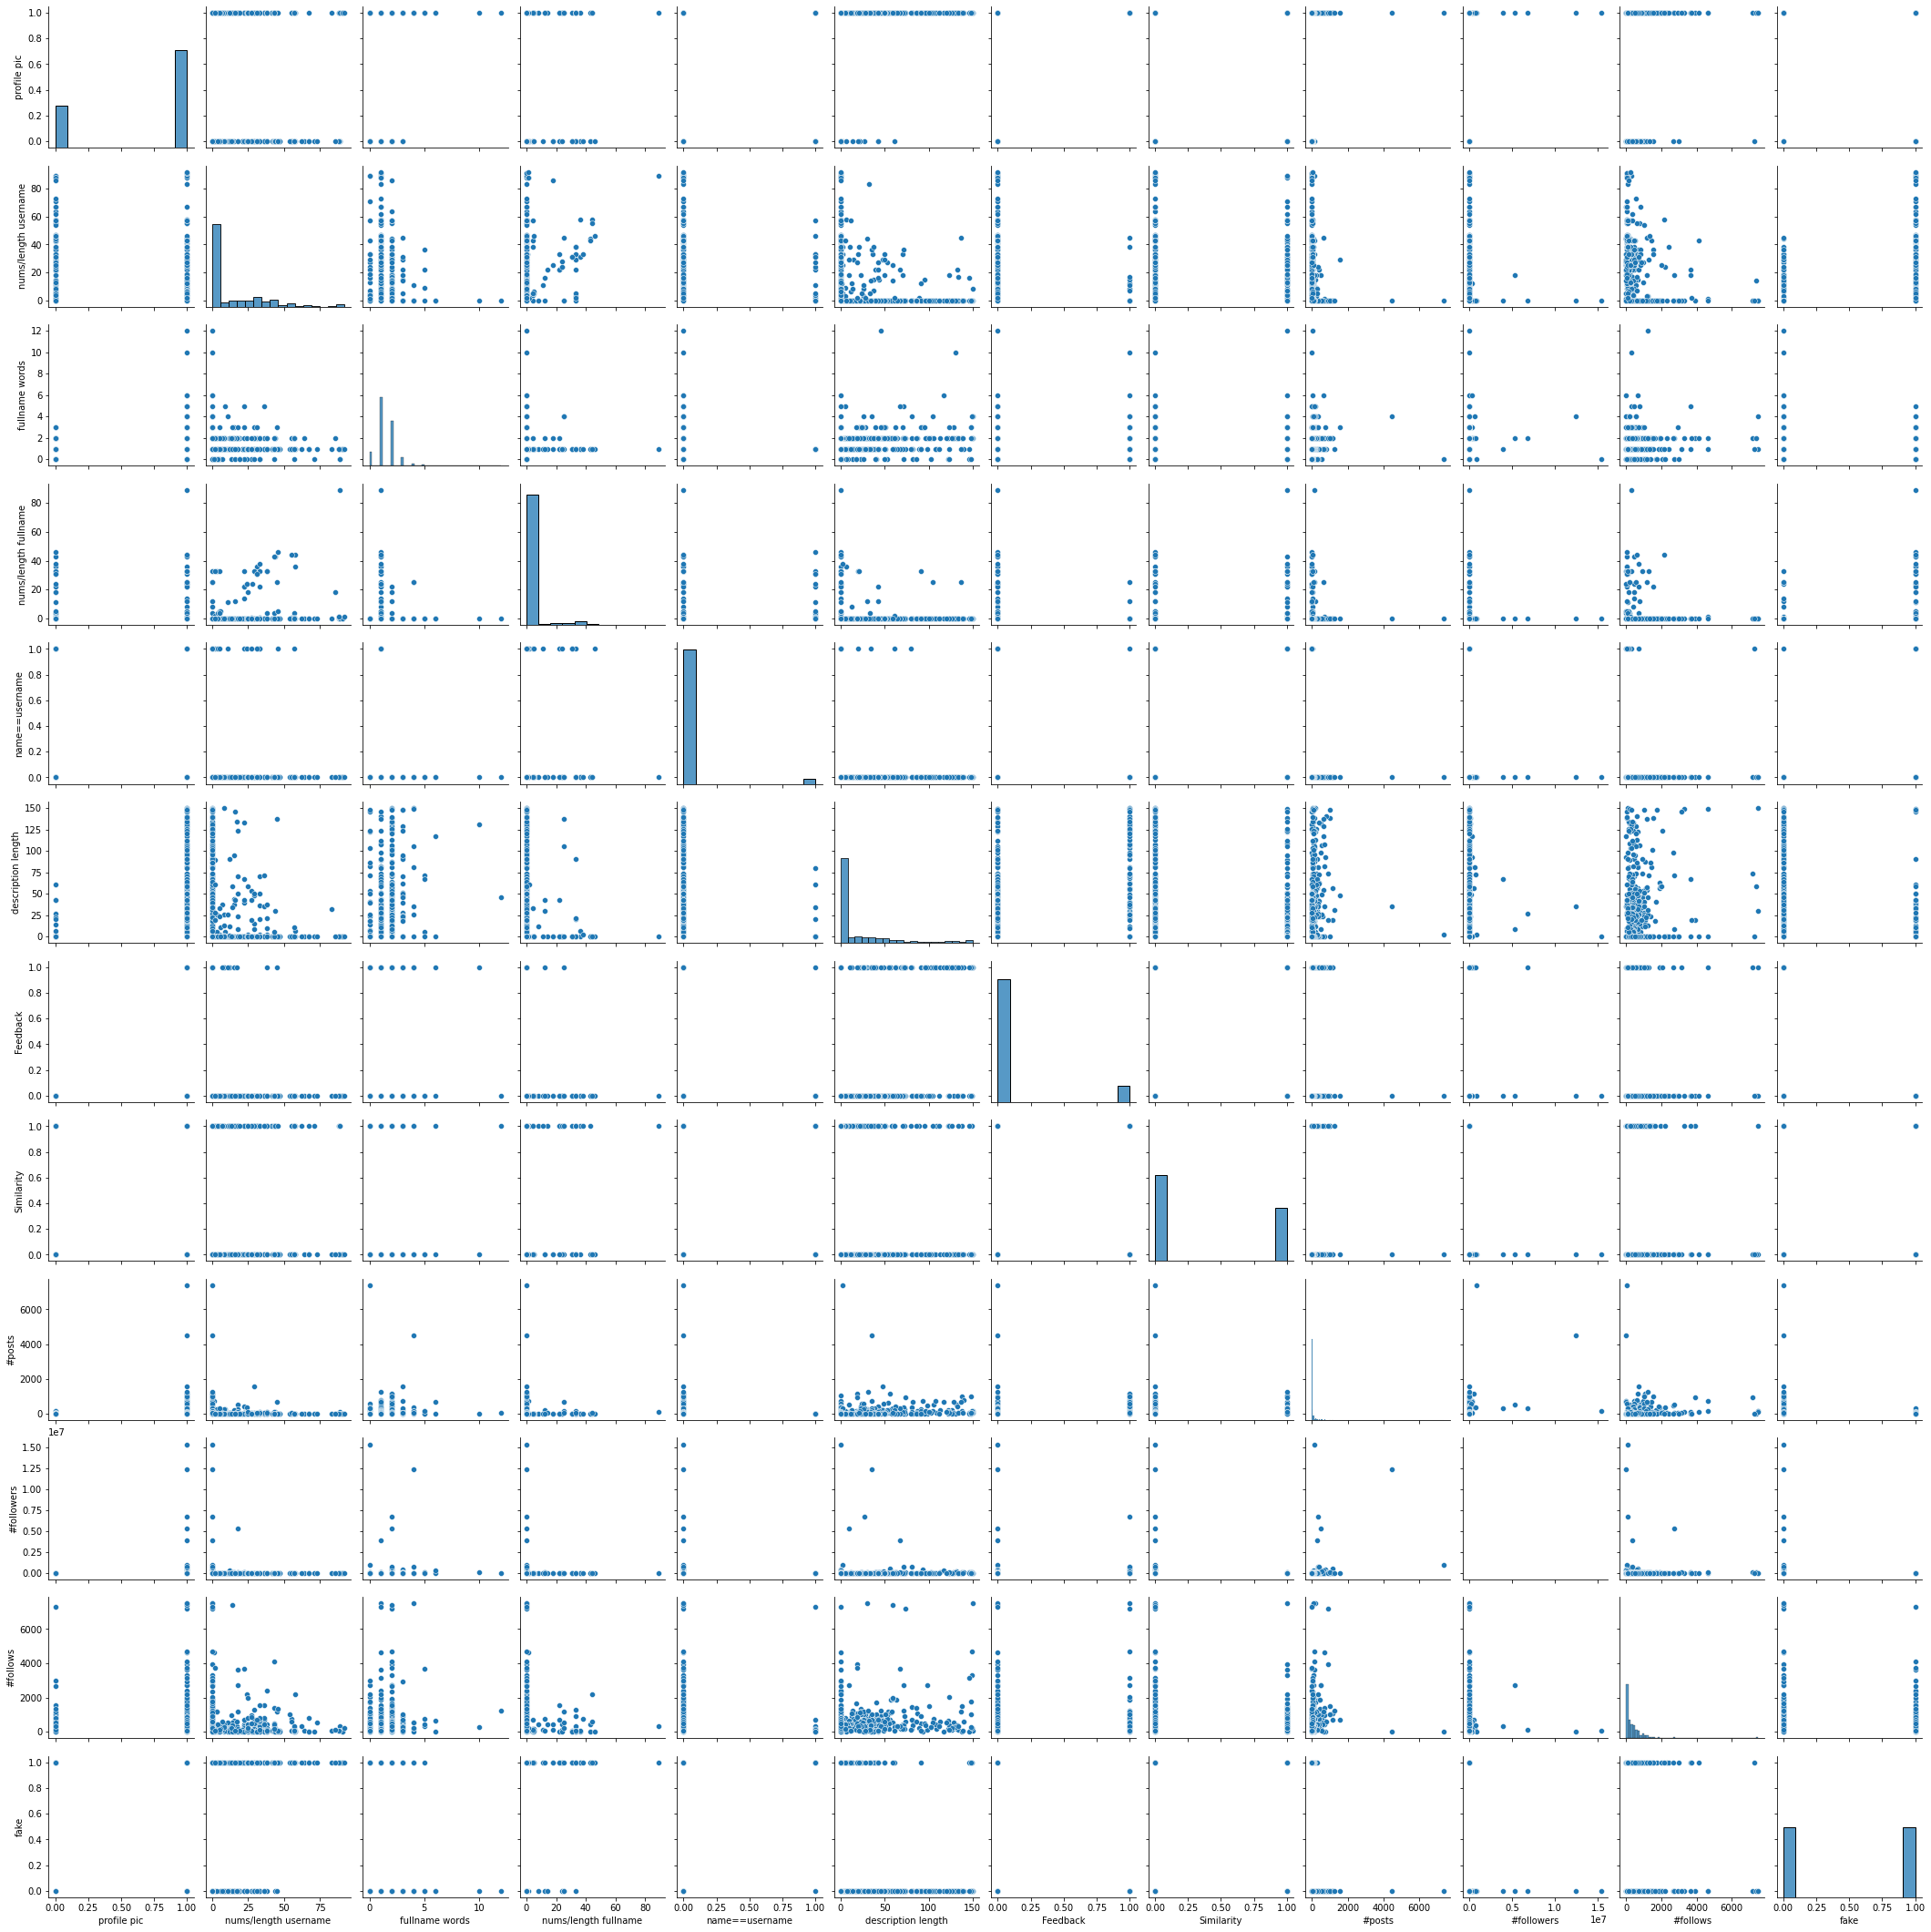

In [ ]:
sns.pairplot(FakeReviews_train)

In [ ]:
train_Y=FakeReviews_train.fake
train_Y=pd.DataFrame(train_Y)
train_Y.tail(12)

,fake
564,1
565,1
566,1
567,1
568,1
569,1
570,1
571,1
572,1
573,1


In [ ]:
train_X= FakeReviews_train.drop(columns='fake')
train_X.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,Feedback,Similarity,#posts,#followers,#follows
0,1,27.0,0,0.0,0,53,0,0,32,1000,955
1,1,0.0,2,0.0,0,44,0,0,286,2740,533
2,1,1.0,2,0.0,0,0,0,1,13,159,98
3,1,0.0,1,0.0,0,82,0,0,679,414,651
4,1,0.0,2,0.0,0,0,0,1,6,151,126


In [ ]:
test_Y=FakeReviews_test.fake
test_Y=pd.DataFrame(test_Y)
test_Y.tail(12)

,fake
108,1
109,1
110,1
111,1
112,1
113,1
114,1
115,1
116,1
117,1


In [ ]:
test_X= FakeReviews_test.drop(columns='fake')
test_X.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,Feedback,Similarity,#posts,#followers,#follows
0,1,3.0,1,4.0,1,30,0,1,35,488,604
1,1,0.0,5,0.0,0,64,0,1,3,35,6
2,1,0.0,2,0.0,0,82,0,1,319,328,668
3,1,0.0,1,0.0,0,143,0,1,273,14890,7369
4,1,5.0,1,0.0,0,76,0,1,6,225,356


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)
logreg_predict= model_1.predict(test_X)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy_score(logreg_predict,test_Y)

0.8916666666666667

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
class FakeReviews(nn.Module):
    def __init__(self):
        super(FakeReviews,self).__init__()
        self.fc1=nn.Linear(11,150)
        self.fc2=nn.Linear(150,150)
        self.fc3=nn.Linear(150,2)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
model=FakeReviews()

In [ ]:
from torch import optim
optimizer=optim.Adam(model.parameters())
criterion=nn.CrossEntropyLoss()

In [ ]:
losses=[]

In [ ]:
samp=[[0,0,0,0,0,0,0,0,0,0,0]]
Input=torch.tensor(samp).float()
out=model(Input)
output=torch.max(out,1)
output.indices
if(output.indices==1):
    print("it's a Fake Review.") 
else:
    print("it's a normal Review.")

it's a Fake Review.
